# Clustering
With using clustering we want to check if the different types of fish is living in different places using the cordinates, and if this is one of the huge impacts on the other ML models we are using

importing Jupyter notebook from preprocess.ipynb


c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

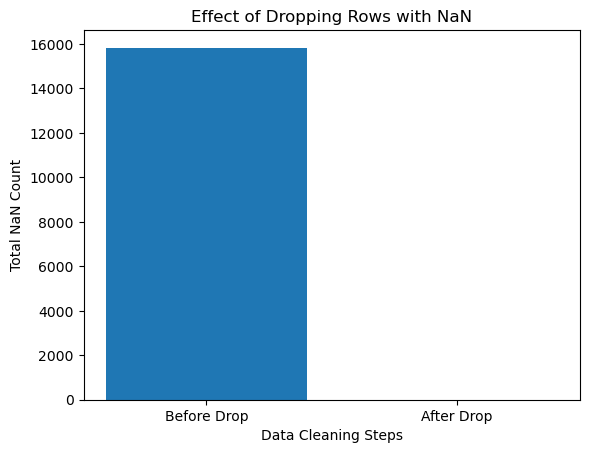

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


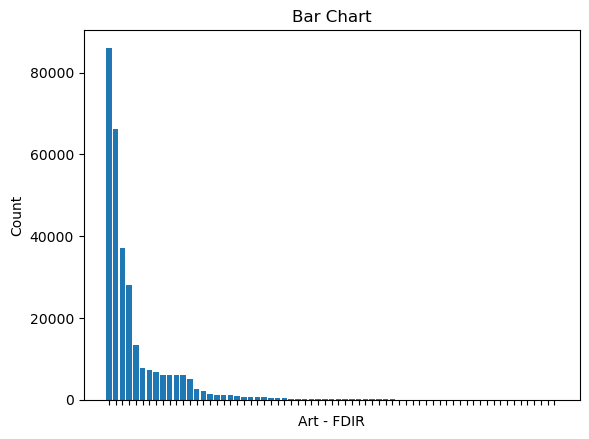

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1


In [6]:
import import_ipynb
from preprocess import df
df.head()

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Selecting features
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# To correlated features 'Startposisjon bredde', 'Startposisjon lengde', 'Stopposisjon bredde', 'Stopposisjon lengde'
# Note to self: In clustering, we typically don't split the data into training and testing sets in the same way as classification
# Here, we're just scaling the data. The clustering process will be done on the entire dataset

In [15]:


# Assuming X_scaled is your preprocessed data
# Initialize the HDBSCAN model
hdbscan_model = HDBSCAN(min_cluster_size=15)

# Fit the model to your data
hdbscan_model.fit(X_scaled)

# Accessing the cluster labels
labels = hdbscan_model.labels_

# The labels_ attribute contains the cluster labels for each data point
# Cluster -1 represents noise points

Silhouette Score: -0.25541851454964426


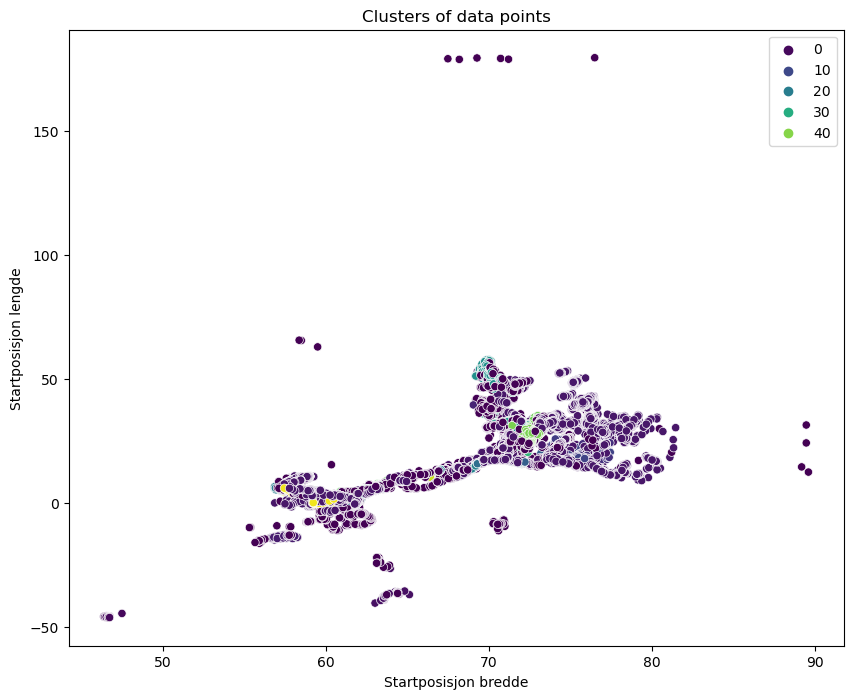

In [16]:
# Evaluating the model
# One common way to evaluate clustering models is by using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Distribution of your data points across the clusters:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters
# With use of StartPosisjon bredde and Startposisjon lengde its easy to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Startposisjon bredde', y='Startposisjon lengde', hue=labels, palette='viridis')
plt.title('Clusters of data points')
plt.show()

# Using Elbow method to find the optimal amount of clusters

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

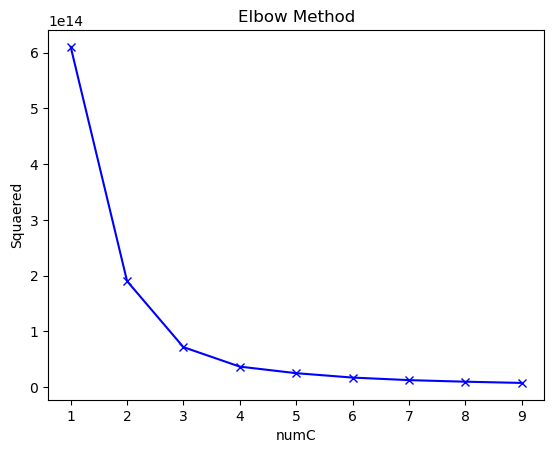

In [10]:

squared_distances = []
numC = range(1,10)
for num_clusters in numC:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    squared_distances.append(kmeans.inertia_)

plt.plot(numC, squared_dist ances, 'bx-')
plt.xlabel('numC') 
plt.ylabel('Squaered') 
plt.title('Elbow Method')
plt.show()

By looking at where it bends we find the optimal numbers of clusters. Which in this case is 2.

In [25]:
y_predict = HDBSCAN.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

TypeError: HDBSCAN.fit_predict() missing 2 required positional arguments: 'self' and 'X'

In [19]:
# Count rows where 'cluster' is 0 and 'ART FDIR' is 0
count_0 = df.loc[(df['cluster'] == df['Hovedart FAO'])].shape[0]
count_1 = df.loc[(df['cluster'] != df['Hovedart FAO'])].shape[0]


In [20]:
acc_based = (count_0/(count_0 + count_1))
print(acc_based)

0.10513647237121673


Based on this score we can see that we get the nearly alike scores like the other ml models. This makes us belive that the clustering has made up catagories wich is the art-fdir. Where we see that the position of the boat has a big impact on what fish we get.

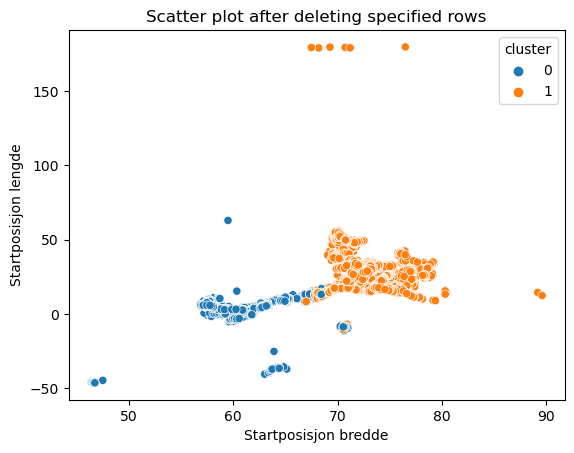

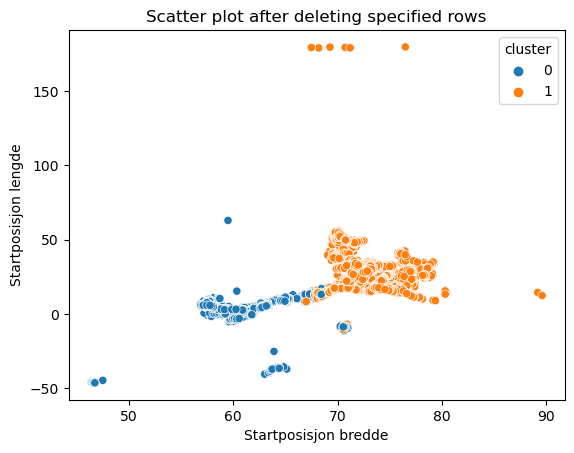

In [23]:
df_0 = df.loc[~((df['cluster'] == 1) & (df['Art - FDIR'] == 1)) & ~((df['cluster'] == 0) & (df['Art - FDIR'] == 0))]
sns.scatterplot(data=df_0, x='Startposisjon bredde', y='Startposisjon lengde', hue='cluster')
plt.title('Scatter plot after deleting specified rows')
plt.show()
#Viser de som er like av art FDIR 0 og 1
df_1 = df.loc[~((df['cluster'] == 0) & (df['Art - FDIR'] == 1)) & ~((df['cluster'] == 1) & (df['Art - FDIR'] == 0))]
sns.scatterplot(data=df_1, x='Startposisjon bredde', y='Startposisjon lengde', hue='cluster')
plt.title('Scatter plot after deleting specified rows')
plt.show()

When we look at the 2 different showing of which one the clusterpredict == art fdir and where it !=. We can see some deviation on some of the points far away from, where its should be clearly difference in where fish get caught, but since the same boat in the same place we will get some wrong for the clustering, where the boat at same place catch both the fish.

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd

In [42]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2'] 

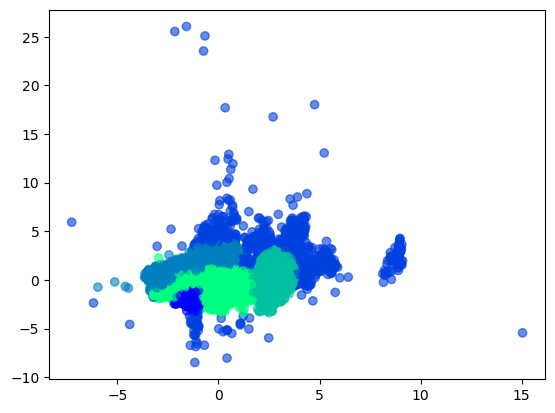

In [49]:
plt.scatter(X_pca['P1'], X_pca['P2'],  
           c = GaussianMixture(n_components = 5).fit_predict(X_pca), cmap =plt.cm.winter, alpha = 0.6) 
plt.show()

In [47]:
gmm = GaussianMixture(n_components=5)
y_predict = gmm.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

[4 1 1 ... 1 1 1]


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12,4
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12,1
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12,1
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12,1
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1,2


In [52]:
counts = df.groupby(['Hovedart FAO', 'cluster']).size().reset_index(name='count')

print(counts)

    Hovedart FAO  cluster  count
0              0        0    465
1              0        1   7019
2              0        2   7242
3              0        3   1971
4              0        4   8308
5              1        0    644
6              1        1   6550
7              1        2   4140
8              1        3      1
9              1        4   7239
10             2        0   4563
11             2        1   4828
12             2        2      2
13             2        4   4140
14             3        0    198
15             3        1   2082
16             3        2   2063
17             3        3   1112
18             3        4   2322
19             4        0    606
20             4        1     88
21             4        2      7
22             4        4   1713
